<a href="https://colab.research.google.com/github/Shadrock/online-GIS-programming-course/blob/master/Week_6/Geoparsing_possible_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One way to do it. 
This notebook represents one possible solution for the coding challenge in the repo. 


In [1]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg to Countries_WGS84.cpg
Saving Countries_WGS84.dbf to Countries_WGS84.dbf
Saving Countries_WGS84.prj to Countries_WGS84.prj
Saving Countries_WGS84.shp to Countries_WGS84.shp
Saving Countries_WGS84.shx to Countries_WGS84.shx


In [3]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all libraries and dependencies

import geopandas as gpd
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

import nltk
import seaborn as sns # used to set the style of the figures


     |████████████████████████████████| 1.0MB 3.9MB/s 
     |████████████████████████████████| 6.5MB 22.0MB/s 
     |████████████████████████████████| 15.3MB 243kB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
     |████████████████████████████████| 2.0MB 3.9MB/s 
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [6]:
def city_map(url):
  """Takes a URL for book txt from project gutenberg, maps cities mentioned, plots frequency of mention"""
  # Makes request to get text
  response = request.urlopen(url)
  raw = response.read().decode('utf8')
  # Identifies cities in the text
  places = GeoText(raw)
  citylist = list(places.cities)
  # Gets lat/lon
  geolocator = Nominatim(user_agent='YOURNAME@YOUREMAIL', timeout=2)
  lat_lon = []
  for city in citylist:
    try:
      location = geolocator.geocode(city)
      if location:
        # print(location.latitude, location.longitude)
        lat_lon.append(location)
    except GeocoderTimedOut as e:
      print("Error: geocode failed on input %s with message %s">
            (city, e))

  # city count distribution - Figures inline and set visualization style
  %matplotlib inline
  sns.set()

  # Create freq dist and plot
  freqdist1 = nltk.FreqDist(citylist)
  freqdist1.plot(20) #running w/out argument plots all words! Specifying the top 25

  # Create data frame
  df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])

  # Unsure
  geometry = [Point(x[1], x[0]) for x in df['Coordinates']]

  # coordinate system I'm using
  crs = {'init': 'epsg:4326'}
  # convert df to geo df
  geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

  # make the map
  countries_map = gpd.read_file('Countries_WGS84.shp') # make sure shp file has been uploaded!

  f, ax = plt.subplots(figsize=(16, 16))
  countries_map.plot(ax=ax, alpha=0.3, color='grey')
  geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)


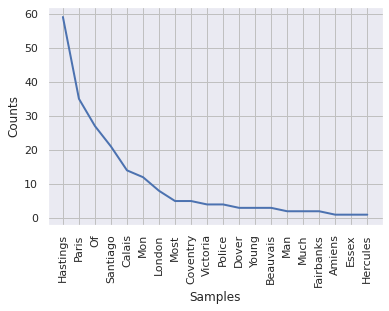

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


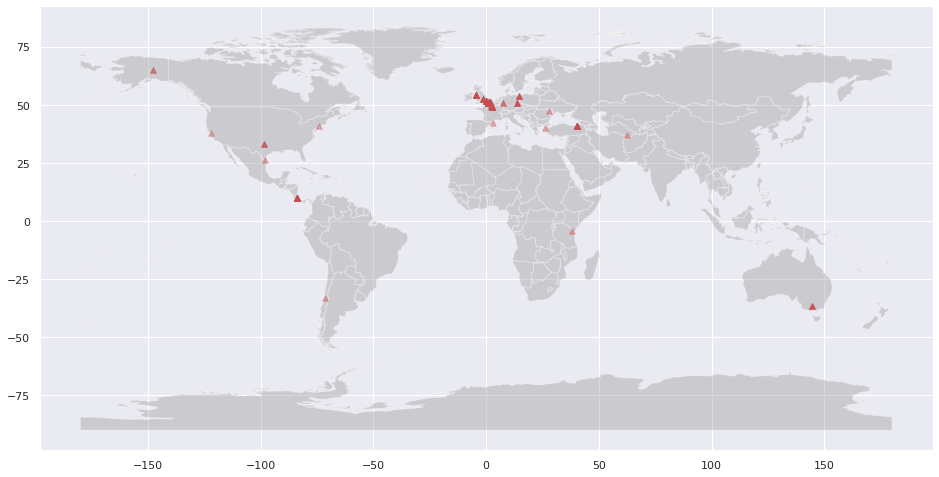

In [7]:
# Run the code using text from an Agatha Christie novel.
city_map('https://www.gutenberg.org/files/58866/58866-0.txt') 